In [1]:
import os
import sys

# Add parent directory to Python path to import modules
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from openai import AsyncOpenAI
from agents import Agent
from agents.mcp.server import MCPServerStdio
from agents.extensions.visualization import draw_graph

from stf_agents.agents import (
    create_stf_manager_agent,
    create_article_parsing_agent,
    create_data_retrieval_agent,
    create_article_writing_agent,
)
from utils.create_config import create_stf_run_config
from configs.config import DEFAULT_STF_MODEL_SETTINGS, TaskModelConfig
from configs.types import ModelName

In [2]:
# Create OpenAI client
openai_client = AsyncOpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
)

# Create STF model configuration
stf_model_config: TaskModelConfig = {
    "model_name": DEFAULT_STF_MODEL_SETTINGS["model_name"],
    "model_settings": DEFAULT_STF_MODEL_SETTINGS["model_settings"],
}

# Create run config using the actual function
run_config = create_stf_run_config(
    openai_client=openai_client,
    session_id="visualization_session",
    stf_model_config=stf_model_config,
)

# Create specialized agents
article_parsing_agent = create_article_parsing_agent(run_config)
data_retrieval_agent = create_data_retrieval_agent(run_config)
article_writing_agent = create_article_writing_agent(run_config, data_retrieval_agent)

In [3]:
current_dir = os.path.dirname(os.path.abspath(sys.argv[0]))
samples_dir = os.path.join(current_dir, "sample_files")
mcp_server = MCPServerStdio(
    name="Filesystem Server, via npx",
    params={
        "command": "npx",
        "args": ["-y", "@modelcontextprotocol/server-filesystem", samples_dir],
    },
)

In [4]:
manager_agent = Agent(
    name="Sequence To Function Manager",
    instructions="",
    handoffs=[
        article_parsing_agent,
        data_retrieval_agent,
        article_writing_agent,
    ],
    mcp_servers=[mcp_server],
)

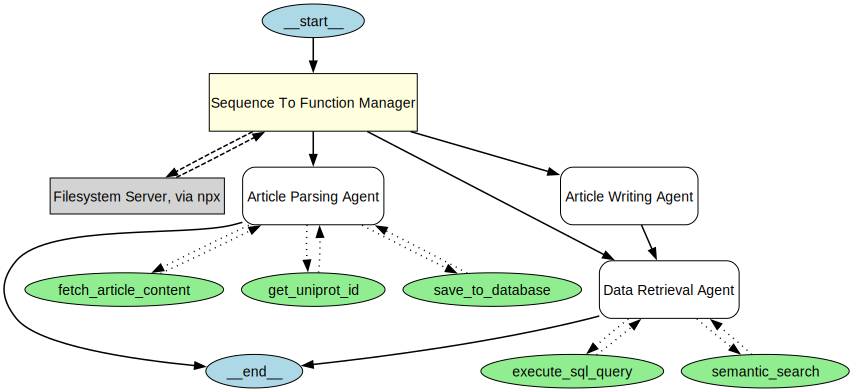

In [5]:
# Draw the agent graph
draw_graph(manager_agent)

=== Article Parsing Agent ===


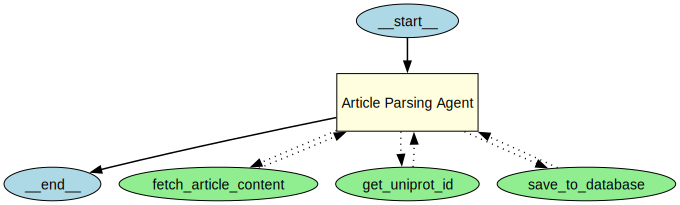

In [6]:
print("=== Article Parsing Agent ===")
draw_graph(article_parsing_agent)


=== Data Retrieval Agent ===


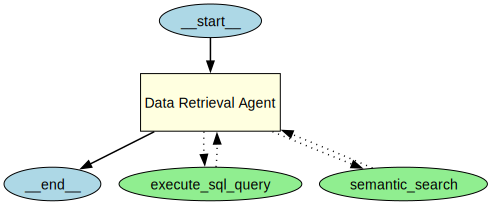

In [7]:
print("\n=== Data Retrieval Agent ===")
draw_graph(data_retrieval_agent)


=== Article Writing Agent ===


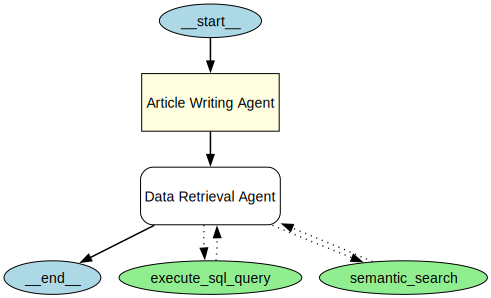

In [8]:
print("\n=== Article Writing Agent ===") 
draw_graph(article_writing_agent)